In [2]:
from google.colab import files

uploaded = files.upload()

Saving abalone.csv to abalone (1).csv


# Importing libraries

In [3]:
import pandas as pd
import numpy as np

# Importing Dataset

In [4]:
df=pd.read_csv("abalone.csv")

In [5]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [6]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [7]:
df.shape

(4177, 9)

The table has 4177 rows and 9 columns

In [8]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

# Checking for null values in the dataframe

In [9]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

There are no null values present.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


# Checking Correlation

In [11]:
import matplotlib.pyplot as plt 
import seaborn as sns

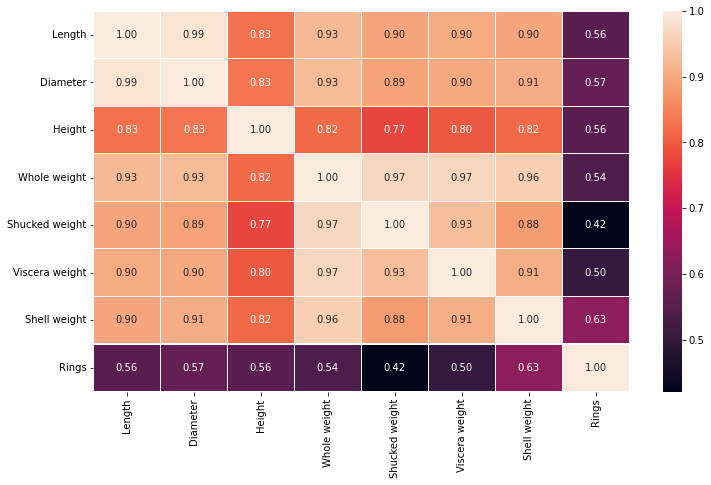

In [12]:

plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="White",fmt=".2f")

- Abalone ring has moderately strong (positive) relationship with all the other features such as length,diameter,height,whole weight,shucked weight, viscera weight, shell weight.

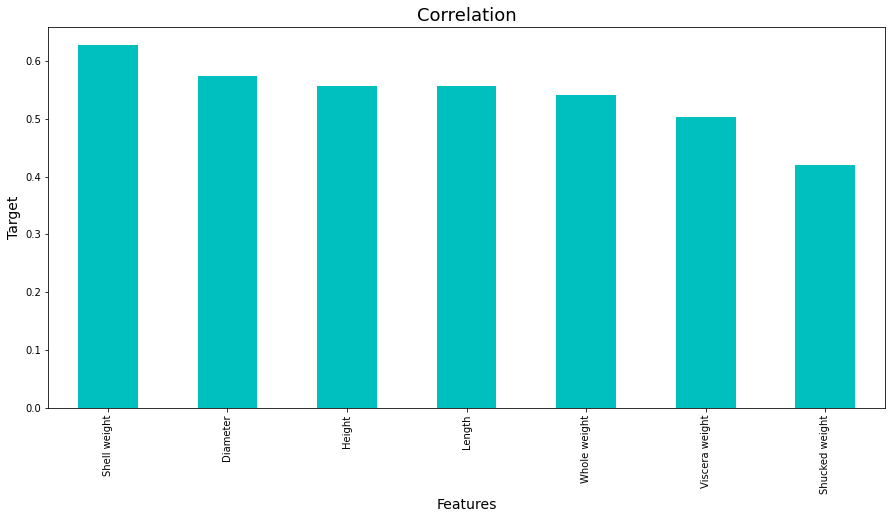

In [13]:
plt.figure(figsize=(15,7))
df.corr()['Rings'].sort_values(ascending=False).drop(['Rings']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()


- All the input features have positive relationship with target variable

# Visualization

In [14]:
import warnings
warnings.filterwarnings('ignore')

M    1528
I    1342
F    1307
Name: Sex, dtype: int64


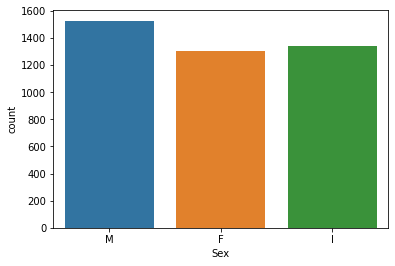

In [15]:
sns.countplot(df["Sex"])
print(df["Sex"].value_counts())

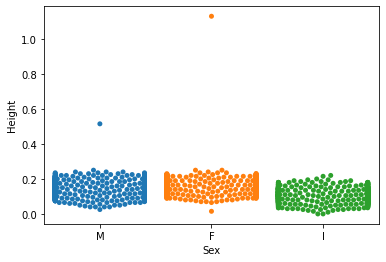

In [16]:
sns.swarmplot(x="Sex",y="Height",data=df)

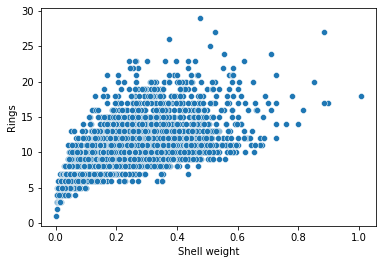

In [17]:
sns.scatterplot(x="Shell weight",y="Rings",data=df)

There is relationship between Rings and Shell Weight of abalone.

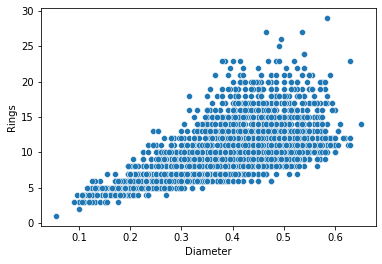

In [18]:
sns.scatterplot(x="Diameter",y="Rings",data=df)

There is relationship between Diameter and Rings of abalone.

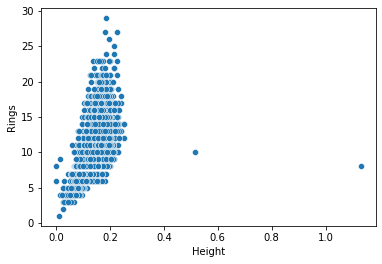

In [19]:
sns.scatterplot(x="Height",y="Rings",data=df)

There is relationship between Height and number of rings in abalone

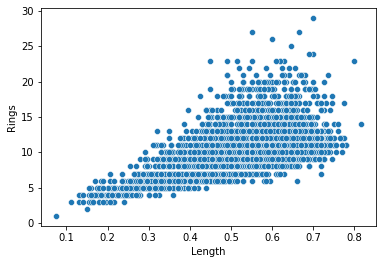

In [20]:
sns.scatterplot(x="Length",y="Rings",data=df)

There is relationship between Length and number of rings in abalone

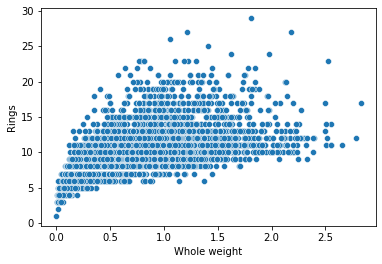

In [21]:
a=sns.scatterplot(x="Whole weight",y="Rings",data=df)

There is relationship between Whole weight and number of rings in abalone

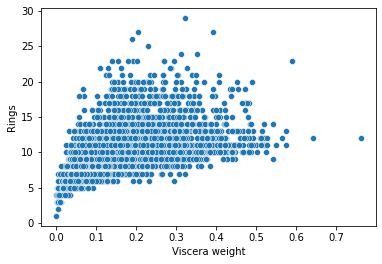

In [22]:
sns.scatterplot(x="Viscera weight",y="Rings",data=df)

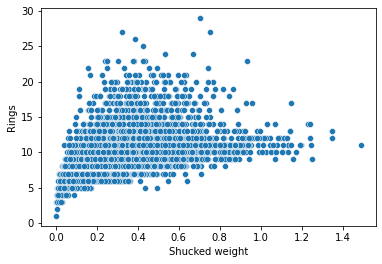

In [23]:
sns.scatterplot(x="Shucked weight",y="Rings",data=df)

There is relationship between Shucked weight and number of rings in abalone

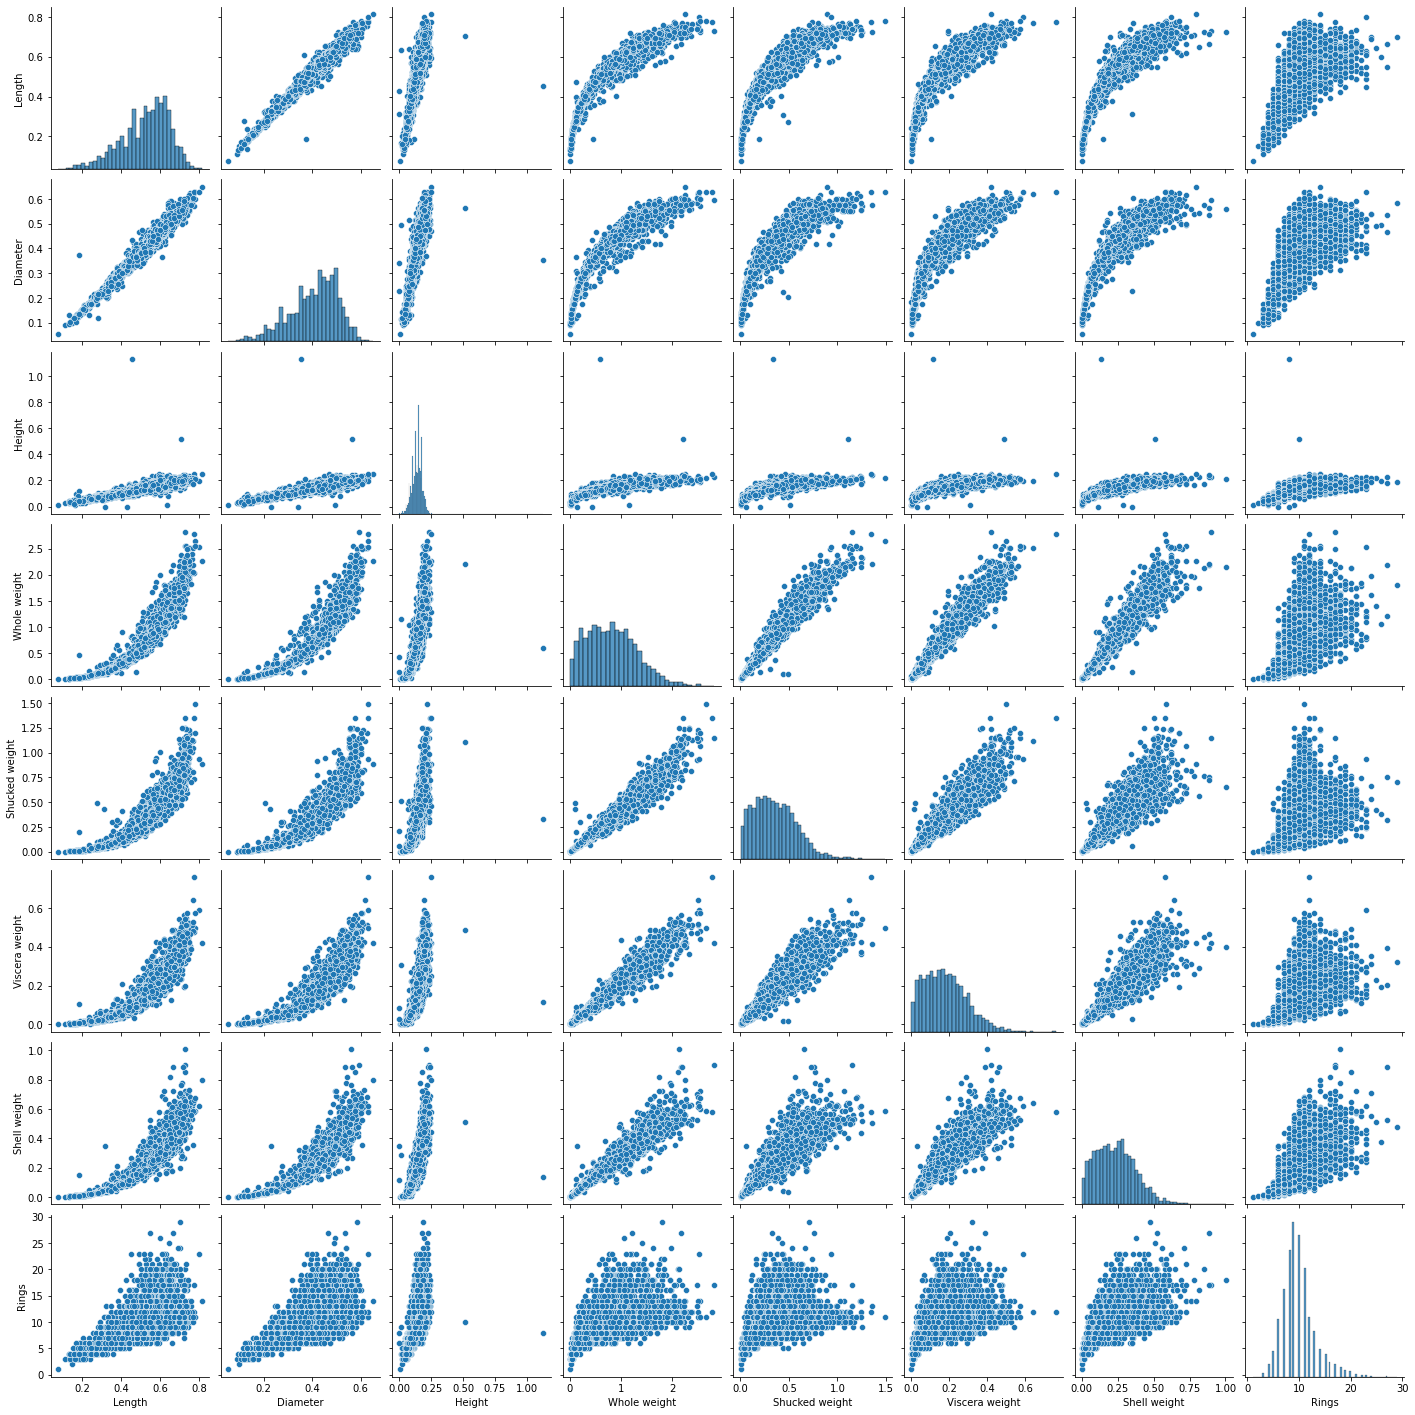

In [24]:
sns.pairplot(df)

# Encoding the categorical data

In [25]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()


In [26]:
df["Sex"]=enc.fit_transform(df["Sex"].values.reshape(-1,1))
df["Sex"]

0       2.0
1       2.0
2       0.0
3       2.0
4       1.0
       ... 
4172    0.0
4173    2.0
4174    2.0
4175    0.0
4176    2.0
Name: Sex, Length: 4177, dtype: float64

In [27]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# Describing data

In [28]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


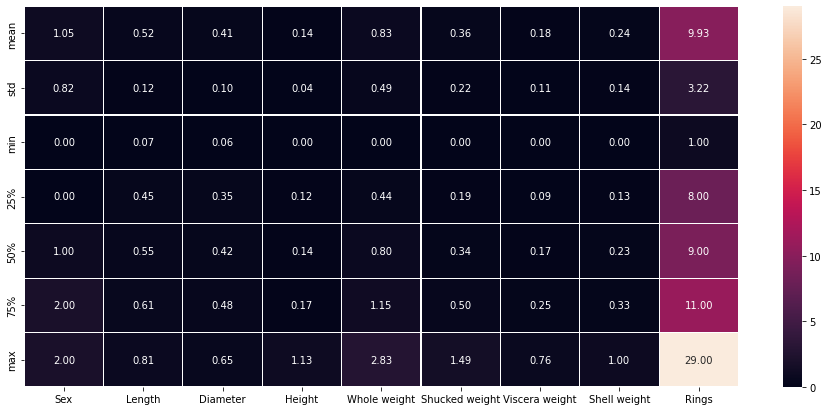

In [29]:
plt.figure(figsize=(16,7))
sns.heatmap(df.describe()[1:],annot=True,linewidths=0.1,linecolor="White",fmt=".2f")

# Detecting Outlier 

In [30]:
from scipy.stats import zscore
(np.abs(zscore(df))<3).all().all()

False

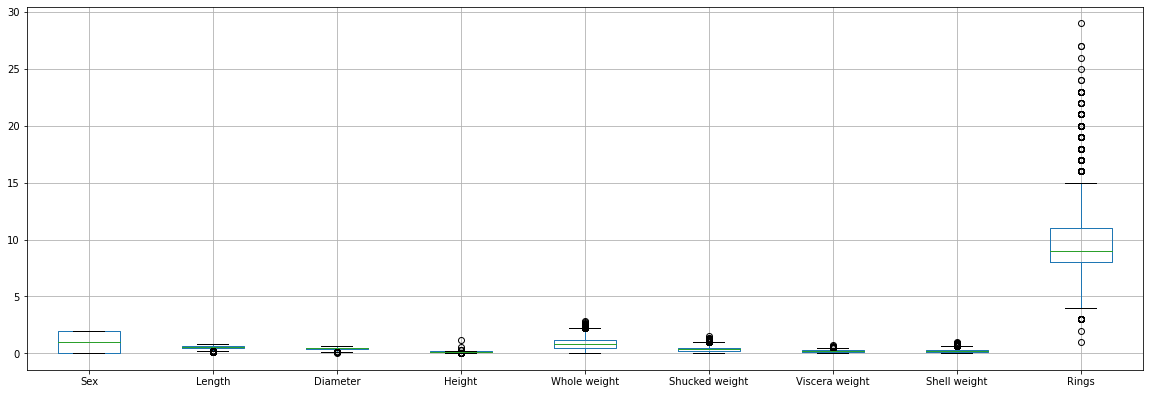

In [31]:
import matplotlib.pyplot as plt
df.iloc[:,0:10].boxplot(figsize=(20,8))
plt.subplots_adjust(bottom=0.25)
plt.show()

In [32]:
df.shape

(4177, 9)

In [33]:
new_df_cap = df.copy()

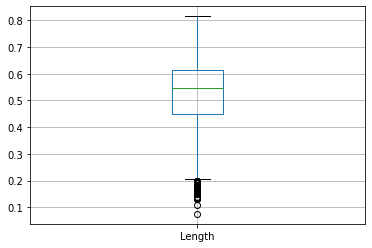

In [34]:
df.boxplot("Length")

In [35]:
Q1 = np.percentile(df['Length'], 25, interpolation = 'midpoint')  
Q3 = np.percentile(df['Length'], 75, interpolation = 'midpoint') 
iqr = Q3 - Q1 
percentile25 = df['Length'].quantile(0.25)
percentile75 = df['Length'].quantile(0.75)
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
df[df['Length'] > upper_limit]
df[df['Length'] < lower_limit]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
148,1.0,0.175,0.130,0.055,0.0315,0.0105,0.0065,0.0125,5
149,1.0,0.170,0.130,0.095,0.0300,0.0130,0.0080,0.0100,4
236,1.0,0.075,0.055,0.010,0.0020,0.0010,0.0005,0.0015,1
237,1.0,0.130,0.100,0.030,0.0130,0.0045,0.0030,0.0040,3
238,1.0,0.110,0.090,0.030,0.0080,0.0025,0.0020,0.0030,3
239,1.0,0.160,0.120,0.035,0.0210,0.0075,0.0045,0.0050,5
305,1.0,0.200,0.145,0.060,0.0370,0.0125,0.0095,0.0110,4
306,1.0,0.165,0.120,0.030,0.0215,0.0070,0.0050,0.0050,3
321,1.0,0.190,0.145,0.040,0.0380,0.0165,0.0065,0.0150,4
465,1.0,0.175,0.125,0.050,0.0235,0.0080,0.0035,0.0080,5


In [36]:
new_df = df[df['Length'] < upper_limit]
new_df.shape

(4177, 9)

In [37]:

new_df_cap['Length'] = np.where(
    new_df_cap['Length'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['Length'] < lower_limit,
        lower_limit,
        new_df_cap['Length']
    )
)

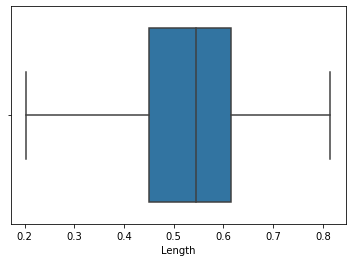

In [38]:
sns.boxplot(new_df_cap['Length'])

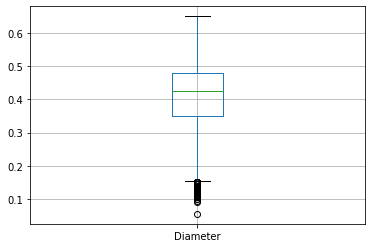

In [39]:
df.boxplot("Diameter")

In [40]:
Q1 = np.percentile(df['Diameter'], 25, interpolation = 'midpoint')  
Q3 = np.percentile(df['Diameter'], 75, interpolation = 'midpoint') 
iqr = Q3 - Q1 
percentile25 = df['Diameter'].quantile(0.25)
percentile75 = df['Diameter'].quantile(0.75)
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
df[df['Diameter'] > upper_limit]
df[df['Diameter'] < lower_limit]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
43,1.0,0.205,0.150,0.055,0.0420,0.0255,0.0150,0.0120,5
44,1.0,0.210,0.150,0.050,0.0420,0.0175,0.0125,0.0150,4
148,1.0,0.175,0.130,0.055,0.0315,0.0105,0.0065,0.0125,5
149,1.0,0.170,0.130,0.095,0.0300,0.0130,0.0080,0.0100,4
236,1.0,0.075,0.055,0.010,0.0020,0.0010,0.0005,0.0015,1
237,1.0,0.130,0.100,0.030,0.0130,0.0045,0.0030,0.0040,3
238,1.0,0.110,0.090,0.030,0.0080,0.0025,0.0020,0.0030,3
239,1.0,0.160,0.120,0.035,0.0210,0.0075,0.0045,0.0050,5
305,1.0,0.200,0.145,0.060,0.0370,0.0125,0.0095,0.0110,4
306,1.0,0.165,0.120,0.030,0.0215,0.0070,0.0050,0.0050,3


In [41]:
new_df = df[df['Diameter'] < upper_limit]
new_df.shape

(4177, 9)

In [42]:

new_df_cap['Diameter'] = np.where(
    new_df_cap['Diameter'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['Diameter'] < lower_limit,
        lower_limit,
        new_df_cap['Diameter']
    )
)

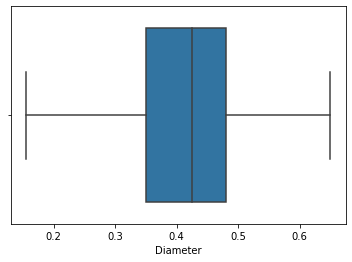

In [43]:
sns.boxplot(new_df_cap['Diameter'])

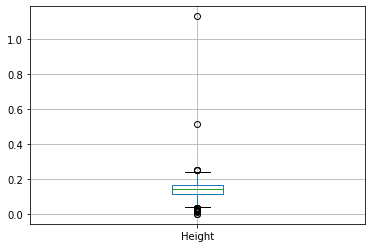

In [44]:
df.boxplot("Height")

In [45]:
Q1 = np.percentile(df['Height'], 25, interpolation = 'midpoint')  
Q3 = np.percentile(df['Height'], 75, interpolation = 'midpoint') 
iqr = Q3 - Q1 
percentile25 = df['Height'].quantile(0.25)
percentile75 = df['Height'].quantile(0.75)
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
df[df['Height'] > upper_limit]
df[df['Height'] < lower_limit]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
236,1.0,0.075,0.055,0.010,0.0020,0.0010,0.0005,0.0015,1
237,1.0,0.130,0.100,0.030,0.0130,0.0045,0.0030,0.0040,3
238,1.0,0.110,0.090,0.030,0.0080,0.0025,0.0020,0.0030,3
239,1.0,0.160,0.120,0.035,0.0210,0.0075,0.0045,0.0050,5
306,1.0,0.165,0.120,0.030,0.0215,0.0070,0.0050,0.0050,3
694,1.0,0.165,0.110,0.020,0.0190,0.0065,0.0025,0.0050,4
718,1.0,0.180,0.125,0.035,0.0265,0.0095,0.0055,0.0085,4
719,1.0,0.150,0.100,0.025,0.0150,0.0045,0.0040,0.0050,2
720,1.0,0.160,0.110,0.025,0.0180,0.0065,0.0055,0.0050,3
1174,0.0,0.635,0.495,0.015,1.1565,0.5115,0.3080,0.2885,9


In [46]:
new_df = df[df['Height'] < upper_limit]
new_df.shape

(4172, 9)

In [47]:

new_df_cap['Height'] = np.where(
    new_df_cap['Height'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['Height'] < lower_limit,
        lower_limit,
        new_df_cap['Height']
    )
)

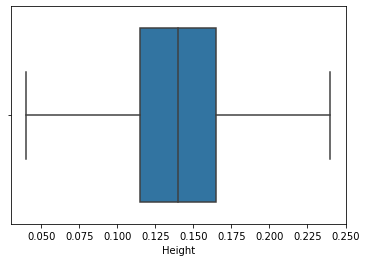

In [48]:
sns.boxplot(new_df_cap['Height'])

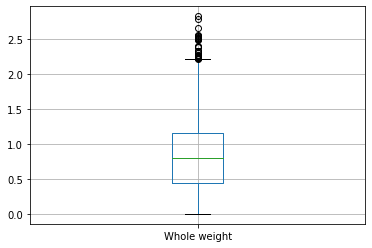

In [49]:
df.boxplot("Whole weight")

In [50]:
Q1 = np.percentile(df['Whole weight'], 25, interpolation = 'midpoint')  
Q3 = np.percentile(df['Whole weight'], 75, interpolation = 'midpoint') 
iqr = Q3 - Q1 
percentile25 = df['Whole weight'].quantile(0.25)
percentile75 = df['Whole weight'].quantile(0.75)
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
df[df['Whole weight'] > upper_limit]
df[df['Whole weight'] < lower_limit]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings


In [51]:
new_df = df[df['Whole weight'] < upper_limit]
new_df.shape

(4147, 9)

In [52]:

new_df_cap['Whole weight'] = np.where(
    new_df_cap['Whole weight'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['Whole weight'] < lower_limit,
        lower_limit,
        new_df_cap['Whole weight']
    )
)

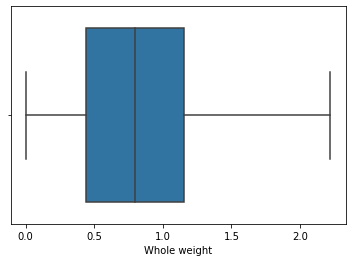

In [53]:
sns.boxplot(new_df_cap['Whole weight'])

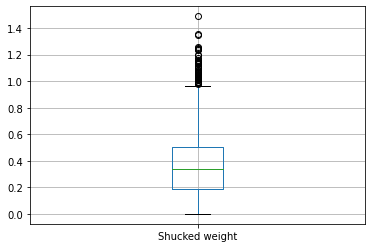

In [54]:
df.boxplot("Shucked weight")

In [55]:
Q1 = np.percentile(df['Shucked weight'], 25, interpolation = 'midpoint')  
Q3 = np.percentile(df['Shucked weight'], 75, interpolation = 'midpoint') 
iqr = Q3 - Q1 
percentile25 = df['Shucked weight'].quantile(0.25)
percentile75 = df['Shucked weight'].quantile(0.75)
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
df[df['Shucked weight'] > upper_limit]
df[df['Shucked weight'] < lower_limit]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings


In [56]:
new_df = df[df['Shucked weight'] < upper_limit]
new_df.shape

(4129, 9)

In [57]:

new_df_cap['Shucked weight'] = np.where(
    new_df_cap['Shucked weight'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['Shucked weight'] < lower_limit,
        lower_limit,
        new_df_cap['Shucked weight']
    )
)

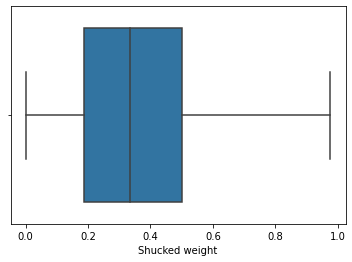

In [58]:
sns.boxplot(new_df_cap['Shucked weight'])

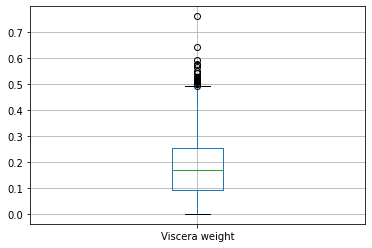

In [59]:
df.boxplot("Viscera weight")

In [60]:
Q1 = np.percentile(df['Viscera weight'], 25, interpolation = 'midpoint')  
Q3 = np.percentile(df['Viscera weight'], 75, interpolation = 'midpoint') 
iqr = Q3 - Q1 
percentile25 = df['Viscera weight'].quantile(0.25)
percentile75 = df['Viscera weight'].quantile(0.75)
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
df[df['Viscera weight'] > upper_limit]
df[df['Viscera weight'] < lower_limit]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings


In [61]:
new_df = df[df['Viscera weight'] < upper_limit]
new_df.shape

(4151, 9)

In [62]:

new_df_cap['Viscera weight'] = np.where(
    new_df_cap['Viscera weight'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['Viscera weight'] < lower_limit,
        lower_limit,
        new_df_cap['Viscera weight']
    )
)

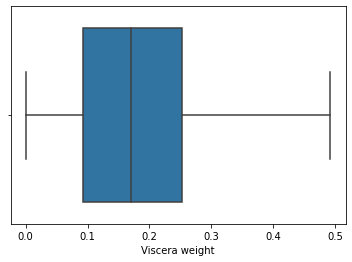

In [63]:
sns.boxplot(new_df_cap['Viscera weight'])

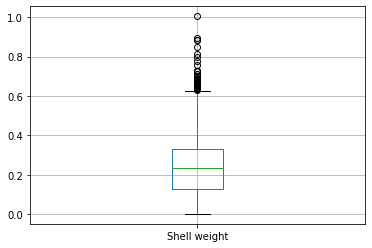

In [64]:
df.boxplot("Shell weight")

In [65]:
Q1 = np.percentile(df['Shell weight'], 25, interpolation = 'midpoint')  
Q3 = np.percentile(df['Shell weight'], 75, interpolation = 'midpoint') 
iqr = Q3 - Q1 
percentile25 = df['Shell weight'].quantile(0.25)
percentile75 = df['Shell weight'].quantile(0.75)
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
df[df['Shell weight'] > upper_limit]
df[df['Shell weight'] < lower_limit]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings


In [66]:
new_df = df[df['Shell weight'] < upper_limit]
new_df.shape

(4142, 9)

In [67]:

new_df_cap['Shell weight'] = np.where(
    new_df_cap['Shell weight'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['Shell weight'] < lower_limit,
        lower_limit,
        new_df_cap['Shell weight']
    )
)

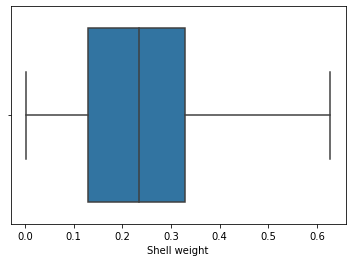

In [68]:
sns.boxplot(new_df_cap['Shell weight'])

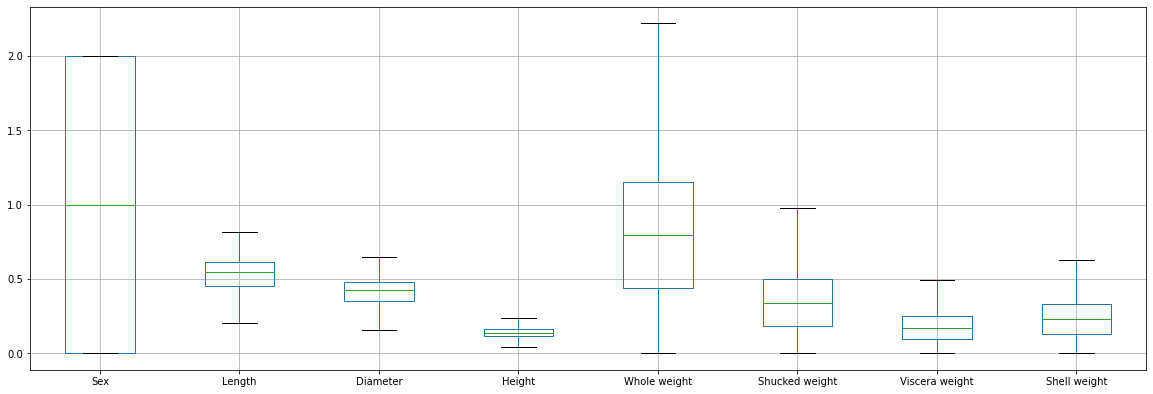

In [69]:
import matplotlib.pyplot as plt
new_df_cap.iloc[:,0:8].boxplot(figsize=(20,8))
plt.subplots_adjust(bottom=0.25)
plt.show()

# Separating feature and target data

In [70]:
x=new_df_cap.drop(["Rings"],axis=1)
x.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [71]:
y=new_df_cap["Rings"]
y.head()

0    15
1     7
2     9
3    10
4     7
Name: Rings, dtype: int64

# Detecting Multicollinearity

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [73]:
calc_vif(x)

,variables,VIF
0,Sex,2.565584
1,Length,725.599611
2,Diameter,777.198313
3,Height,91.445085
4,Whole weight,408.607917
5,Shucked weight,104.342818
6,Viscera weight,64.283794
7,Shell weight,89.494026


Looking at correlation matrix, we observe that Length and Shucked contribute less when compared to diameter and whole weight.

In [74]:
X = x.drop(["Length","Shucked weight"],axis=1)
calc_vif(X)

,variables,VIF
0,Sex,2.548327
1,Diameter,83.772181
2,Height,88.470866
3,Whole weight,130.544718
4,Viscera weight,61.433655
5,Shell weight,58.246755


In [75]:
X.skew().sort_values()

Diameter         -0.548711
Height           -0.217345
Sex              -0.098155
Shell weight      0.458793
Whole weight      0.468875
Viscera weight    0.517749
dtype: float64

Text(0, 0.5, 'Shell weight')

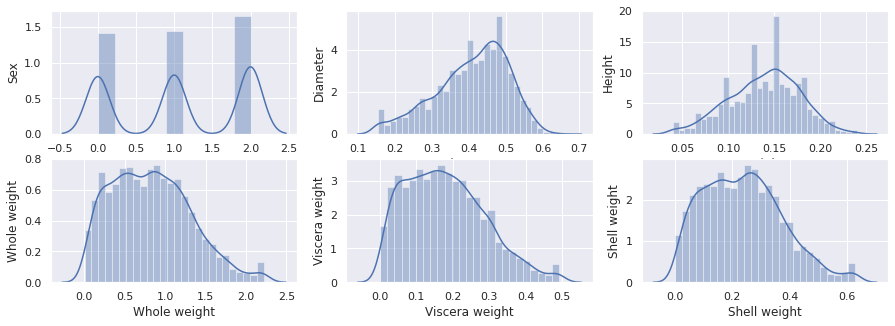

In [76]:
import matplotlib.pyplot as plt
sns.set()
fig, axes = plt.subplots(2, 3,figsize=(15, 5))

sns.distplot(X["Sex"],ax=axes[0,0])
axes[0,0].set_ylabel("Sex")

sns.distplot(X["Diameter"],ax=axes[0,1])
axes[0,1].set_ylabel("Diameter")

sns.distplot(X["Height"],ax=axes[0,2])
axes[0,2].set_ylabel("Height")

sns.distplot(X["Whole weight"],ax=axes[1,0])
axes[1,0].set_ylabel("Whole weight")

sns.distplot(X["Viscera weight"],ax=axes[1,1])
axes[1,1].set_ylabel("Viscera weight")

sns.distplot(X["Shell weight"],ax=axes[1,2])
axes[1,2].set_ylabel("Shell weight")



In [77]:
from sklearn.preprocessing import power_transform

In [78]:
new=power_transform(X)

In [79]:
df8=pd.DataFrame(new)
df8.head()

,0,1,2,3,4,5
0,1.127072,-0.549657,-1.151652,-0.581125,-0.696706,-0.596905
1,1.127072,-1.399575,-1.270360,-1.350951,-1.331351,-1.329375
2,-1.307935,0.011964,-0.153737,-0.202580,-0.259664,-0.108396
3,1.127072,-0.549657,-0.411379,-0.576264,-0.551792,-0.554347
4,-0.009459,-1.473494,-1.503848,-1.411644,-1.448804,-1.478502


In [80]:
df8.skew().sort_values()

0   -0.176442
1   -0.067105
2   -0.013011
3   -0.006958
5    0.022960
4    0.039593
dtype: float64

Text(0, 0.5, 'Shell weight')

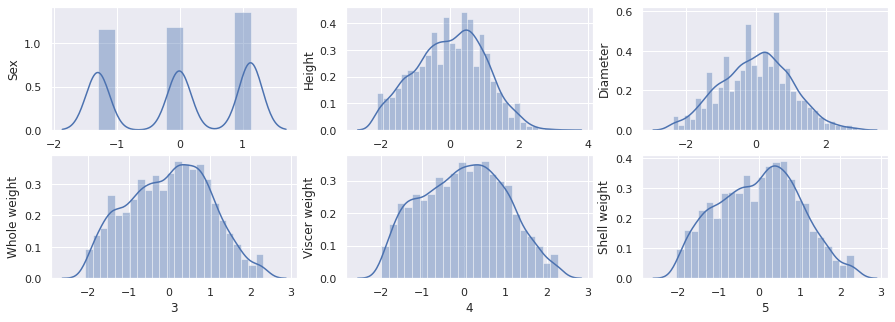

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
fig, axes = plt.subplots(2, 3,figsize=(15, 5))

sns.distplot(df8.iloc[:,0],ax=axes[0,0])
axes[0,0].set_ylabel("Sex")

sns.distplot(df8.iloc[:,1],ax=axes[0,1])
axes[0,1].set_ylabel("Height")

sns.distplot(df8.iloc[:,2],ax=axes[0,2])
axes[0,2].set_ylabel("Diameter")

sns.distplot(df8.iloc[:,3],ax=axes[1,0])
axes[1,0].set_ylabel("Whole weight")

sns.distplot(df8.iloc[:,4],ax=axes[1,1])
axes[1,1].set_ylabel("Viscer weight")

sns.distplot(df8.iloc[:,5],ax=axes[1,2])
axes[1,2].set_ylabel("Shell weight")



# Oversampling

In [82]:
y.unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24])

In [83]:
y.value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: Rings, dtype: int64

# Oversampling

Can you explain in feedback why SMOTE doesnt work but random sampler works but using random sampler give wrong confusion matrix

In [84]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
x_new,y_new=smt.fit_resample(df8,y)

y_new.value_counts()

ValueError: ignored

In [85]:

from imblearn.over_sampling import RandomOverSampler
smt=RandomOverSampler()
x_new,y_new=smt.fit_resample(df8,y)

y_new.value_counts()

15    689
7     689
25    689
27    689
2     689
29    689
23    689
26    689
3     689
1     689
22    689
17    689
21    689
6     689
4     689
5     689
13    689
18    689
12    689
11    689
14    689
19    689
16    689
20    689
8     689
10    689
9     689
24    689
Name: Rings, dtype: int64

In [86]:
y=pd.DataFrame(y_new)

In [87]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


In [88]:
mns=MinMaxScaler()
s=mns.fit_transform(x_new)
x=pd.DataFrame(data=s)
print(x)

              0         1         2         3         4         5
0      1.000000  0.291839  0.233590  0.339575  0.303288  0.331000
1      1.000000  0.133366  0.211138  0.163806  0.154537  0.163582
2      0.000000  0.396557  0.422332  0.426005  0.405724  0.442657
3      1.000000  0.291839  0.373602  0.340685  0.337254  0.340727
4      0.533253  0.119583  0.166977  0.149948  0.127007  0.129496
...         ...       ...       ...       ...       ...       ...
19287  0.000000  0.799327  0.682011  0.876030  0.763070  0.831398
19288  0.000000  0.799327  0.682011  0.876030  0.763070  0.831398
19289  0.000000  0.799327  0.682011  0.876030  0.763070  0.831398
19290  0.000000  0.799327  0.682011  0.876030  0.763070  0.831398
19291  0.000000  0.799327  0.682011  0.876030  0.763070  0.831398

[19292 rows x 6 columns]


In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lg=LogisticRegression()

In [91]:
for i in range(0,50):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lg.fit(x_train,y_train)
    pred_train=lg.predict(x_train)
    pred_test=lg.predict(x_test)
    if  round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i)
        print("training accuracy: ",round(accuracy_score(y_train,pred_train)))
        print("testing accuracy:", round(accuracy_score(y_test,pred_test)))
        print("\n")

At random state 8
training accuracy:  0
testing accuracy: 0


At random state 18
training accuracy:  0
testing accuracy: 0


At random state 38
training accuracy:  0
testing accuracy: 0


At random state 46
training accuracy:  0
testing accuracy: 0




In [92]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print("Mean Absolute Error ",mean_absolute_error(y_test,pred_test))
print("Mean Sq. Error ",mean_squared_error(y_test,pred_test))
print("Root Mean Sq ",np.sqrt(mean_squared_error(y_test,pred_test)))

Mean Absolute Error  3.1132417724799173
Mean Sq. Error  25.591085773516454
Root Mean Sq  5.05876326521774


In [93]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=998)

In [94]:
lg.fit(x_train,y_train) 
pred_train=lg.predict(x_train)
pred_test=lg.predict(x_test)

In [95]:
accuracy_score(y_train,pred_train)

0.37866908572539365

In [96]:
accuracy_score(y_test,pred_test)

0.3744493392070485

In [97]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           1       0.70      1.00      0.83       156
           2       0.54      1.00      0.70       138
           3       0.43      0.15      0.22       142
           4       0.39      0.25      0.31       151
           5       0.41      0.37      0.39       141
           6       0.27      0.42      0.33       130
           7       0.24      0.23      0.23       159
           8       0.15      0.32      0.20       130
           9       0.19      0.22      0.20       140
          10       0.17      0.05      0.07       145
          11       0.19      0.35      0.24       139
          12       0.16      0.08      0.10       141
          13       0.07      0.03      0.04       139
          14       0.04      0.01      0.01       132
          15       0.14      0.02      0.04       136
          16       0.17      0.04      0.07       141
          17       0.00      0.00      0.00       143
          18       0.00    

# Cross Validation

In [98]:
pred_lg=lg.predict(x_test)
lss=accuracy_score(y_test,pred_lg)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lg,x,y,cv=j)
    print(cv_score)
    cv_mean=cv_score.mean()
    print("At cv:",j)
    print("cv score is ",cv_mean*100)
    print("accuracy is", lss*100)
    print("\n")

[0.33412814 0.3308107 ]
At cv: 2
cv score is  33.246941737507775
accuracy is 37.44493392070485


[0.33494013 0.341471   0.34292379]
At cv: 3
cv score is  33.9778309428016
accuracy is 37.44493392070485


[0.33298777 0.34397678 0.34273274 0.33464649]
At cv: 4
cv score is  33.85859423595273
accuracy is 37.44493392070485


[0.32806427 0.34646281 0.343183   0.3439606  0.33592535]
At cv: 5
cv score is  33.951920543911065
accuracy is 37.44493392070485


[0.3324005  0.34483831 0.34898911 0.33934681 0.33903577 0.3377916 ]
At cv: 6
cv score is  34.040035050254176
accuracy is 37.44493392070485


[0.32402032 0.34724238 0.34542816 0.33962264 0.33599419 0.34361393
 0.34288824]
At cv: 7
cv score is  33.982998133941535
accuracy is 37.44493392070485


[0.32462687 0.34411277 0.34369818 0.35447761 0.34135214 0.34757362
 0.33678971 0.33969307]
At cv: 8
cv score is  34.15404958822643
accuracy is 37.44493392070485


[0.32322761 0.34421642 0.35401119 0.34141791 0.34235075 0.33691087
 0.3359776  0.34391041 0.

In [99]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error,mean_squared_error

def model_selection(algorithm_instance,x_train,y_train,x_test,y_test):
    algorithm_instance.fit(x_train,y_train)
    model_pred_train=algorithm_instance.predict(x_train)
    model_pred_test=algorithm_instance.predict(x_test)
    print("Accuracy of training model :",accuracy_score(y_train,model_pred_train))
    print("Accuracy of test data :",accuracy_score(y_test,model_pred_test))
    print("Classification report for test data\n",classification_report(y_test,model_pred_test))
    print("Classification report for training data\n",classification_report(y_train,model_pred_train))
    print("Confusion Matrix\n",confusion_matrix(y_test,model_pred_test))
    print("Mean Absolute Error ",mean_absolute_error(y_test,pred_test))
    print("Mean Sq. Error ",mean_squared_error(y_test,pred_test))
    print("Root Mean Sq ",np.sqrt(mean_squared_error(y_test,pred_test)))



In [100]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()

model_selection(KNN,x_train,y_train,x_test,y_test)

Accuracy of training model : 0.8788310762651461
Accuracy of test data : 0.8051308629178544
Classification report for test data
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       156
           2       1.00      1.00      1.00       138
           3       1.00      1.00      1.00       142
           4       0.97      1.00      0.98       151
           5       0.81      0.97      0.88       141
           6       0.52      0.72      0.60       130
           7       0.47      0.34      0.39       159
           8       0.32      0.32      0.32       130
           9       0.30      0.17      0.22       140
          10       0.29      0.16      0.20       145
          11       0.33      0.20      0.25       139
          12       0.48      0.45      0.46       141
          13       0.61      0.60      0.60       139
          14       0.70      0.81      0.75       132
          15       0.71      0.93      0.81       136
       

In [101]:
from sklearn import svm
s=svm.SVC()
model_selection(s,x_train,y_train,x_test,y_test)

Accuracy of training model : 0.4474178707963455
Accuracy of test data : 0.42601710287639283
Classification report for test data
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       156
           2       0.31      1.00      0.47       138
           3       0.36      0.15      0.21       142
           4       0.44      0.25      0.32       151
           5       0.47      0.48      0.48       141
           6       0.28      0.40      0.33       130
           7       0.35      0.25      0.29       159
           8       0.21      0.36      0.26       130
           9       0.21      0.19      0.20       140
          10       0.21      0.12      0.16       145
          11       0.17      0.22      0.19       139
          12       0.07      0.06      0.06       141
          13       0.13      0.07      0.09       139
          14       0.23      0.20      0.22       132
          15       0.19      0.14      0.16       136
      

# Regularization

In [102]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state': list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [109]:
ls=Lasso(alpha=0.0001,random_state=0)
ls.fit(x_train,y_train)
ls_score_train=ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
ls_score_train*100

77.1272071658482

In [110]:
lss=r2_score(y_test,pred_ls)
lss*100

77.460641219847

In [111]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean*100

-415.1284962918032

# Ensemble Methods

In [106]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameter={'criterion':['mse','mae'],
          'max_features' : ["auto","sqrt","log2"]}

rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameter)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'sqrt'}


In [112]:
rf=RandomForestRegressor(criterion='mse',max_features="sqrt")
rf.fit(x_train,y_train)
train_r2=rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)
print('Training r2',train_r2*100)

rfs=r2_score(y_test,pred_decision)
print('R2 Score:', rfs*100)

rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)


Training r2 99.87667190017636
R2 Score: 99.13540921354331
Cross Val Score: -52.26101768955325


# ROC AUC

Why ROC AUC not working for multiclass classifier. 
Give feedback

In [118]:
from sklearn.metrics import roc_curve,auc
fpr, tpr, thresholds = roc_curve(pred_test,y_test)
roc_auc= auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False POsitive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc='lower right')
plt.show()

ValueError: ignored

# Saving Model

In [113]:
import pickle
filename='hap.pk1'
pickle.dump(rf,open(filename,'wb'))

In [114]:
loaded_model=pickle.load(open('hap.pk1','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

99.13540921354331


In [115]:
conc=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=["Predicted","Original"])
conc

,0,1,2,3,4,5,6,7,8,9,...,3849,3850,3851,3852,3853,3854,3855,3856,3857,3858
Predicted,29.0,19.0,3.0,4.0,9.43,3.0,11.48,4.03,16.95,13.33,...,26.0,11.78,23.0,10.99,20.0,23.0,2.0,15.0,20.0,27.0
Original,29.0,19.0,3.0,4.0,9.43,3.0,11.48,4.03,16.95,13.33,...,26.0,11.78,23.0,10.99,20.0,23.0,2.0,15.0,20.0,27.0
